Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
enrollments = read_csv('enrollments.csv')
daily_engagement =  read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [7]:
for element in daily_engagement:
    element['account_key'] = element['acct']
    del element['acct']

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def unique(list_data):
    keys = {}
    for element in list_data:
        if element['account_key'] in keys:
            keys[element['account_key']] += 1
        else:
            keys[element['account_key']] = 1
    return keys

enrollment_num_rows = len(enrollments)
enrollment_unique_students = unique(enrollments)
enrollment_num_unique_students = len(enrollment_unique_students)
print(enrollment_num_rows)
print(enrollment_num_unique_students)

engagement_num_rows = len(daily_engagement)
engagement_unique_students = unique(daily_engagement)
engagement_num_unique_students = len(engagement_unique_students)
print(engagement_num_rows)
print(engagement_num_unique_students)

submission_num_rows = len(project_submissions)
submission_unique_students = unique(project_submissions)
submission_num_unique_students = len(submission_unique_students)
print(submission_num_rows)
print(submission_num_unique_students)


1640
1302
136240
1237
3642
743


## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

print(daily_engagement[0]['account_key'])

0


## Missing Engagement Records

In [10]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrollment in enrollments:
    
    if not enrollment['account_key'] in engagement_unique_students and enrollment['join_date'] != enrollment['cancel_date']:
        print(enrollment, "\n")

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)]) 

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)]) 

OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)]) 



## Checking for More Problem Records

In [11]:
test_accounts = set()

for enrollment in enrollments:
    if enrollment['is_udacity']:
        test_accounts.add(enrollment['account_key'])

In [12]:
def remove_test_accounts(data):
    non_udacity_accounts = []
    
    for element in data:
        if element['account_key'] not in test_accounts:
            non_udacity_accounts.append(element)
    return non_udacity_accounts

In [13]:
non_udacity_enrollments = remove_test_accounts(enrollments)
non_udacity_engagements = remove_test_accounts(daily_engagement)
non_udacity_submissions = remove_test_accounts(project_submissions)

In [14]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] is None or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[enrollment['account_key']] = enrollment['join_date']
        
print(len(paid_students))

995


## Tracking Down the Remaining Problems

In [15]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [16]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [17]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [18]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] is None or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment['join_date']
print(len(paid_students))

995


## Getting Data from First Week

In [19]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [20]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement in non_udacity_engagements:
    join_date = paid_students.get(engagement['account_key'], None)
    engagement_date = engagement['utc_date']
    if join_date is not None and within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)
print(len(paid_engagement_in_first_week))

6919


## Exploring Student Engagement

In [21]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [22]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [23]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())

print("Sum:", sum(total_minutes))
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Sum: 305174.7851196613
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [24]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## Lessons Completed in First Week

In [25]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.


def group_data(data, key):
    grouped_data = defaultdict(list)
    for engagement_record in data:
        account_key = engagement_record[key]
        grouped_data[account_key].append(engagement_record)
    return grouped_data


def sum_grouped_items(grouped_data, field_name):
    group_sum = {}
    for key, data_points in grouped_data.items(): 
        total = 0
        for data_point in data_points:
            if data_point[field_name] > 0:
                total += data_point[field_name]
            
        group_sum[key] = total
    return group_sum

lessons_by_account = group_data(paid_engagement_in_first_week, 'account_key')
total_lessons_by_account = sum_grouped_items(lessons_by_account, 'lessons_completed')

    
total_lessons = list(total_lessons_by_account.values())

print("Sum:", sum(total_lessons))
print('Mean:', np.mean(total_lessons))
print('Standard deviation:', np.std(total_lessons))
print('Minimum:', np.min(total_lessons))
print('Maximum:', np.max(total_lessons))

Sum: 1628
Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [26]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
def sum_days_visited(grouped_data, field_name):
    group_sum = {}
    for key, data_points in grouped_data.items(): 
        total = 0
        for data_point in data_points:
            if data_point[field_name] > 0:
                total += 1
            
        group_sum[key] = total
    return group_sum

total_days_by_account = sum_days_visited(lessons_by_account, 'num_courses_visited')

total_days = list(total_days_by_account.values())
print("Sum:", sum(total_days))
print('Mean:', np.mean(total_days))
print('Standard deviation:', np.std(total_days))
print('Minimum:', np.min(total_days))
print('Maximum:', np.max(total_days))


Sum: 2853
Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [27]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []
# assigned_rating
data_by_key = group_data(paid_engagement_in_first_week, 'account_key')

submissions = set()
for data in non_udacity_submissions:
    if data['lesson_key'] in subway_project_lesson_keys and (data['assigned_rating'] == 'PASSED' or data['assigned_rating'] == 'DISTINCTION'):
        submissions.add(data['account_key'])

for key, data_points in data_by_key.items():
    for data_point in data_points:
        if data_point['account_key'] in submissions:
            passing_engagement.append(data_point)
        else:
            non_passing_engagement.append(data_point)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [34]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
# 'total_minutes_visited'
# projects_completed

def mean_metrics(data_points, key):
    minutes = 0;
    keys = set()
    for data_point in data_points:
        minutes += data_point[key]
        keys.add(data_point['account_key'])
    
    return minutes/len(keys)

passing_lessons_by_key = group_data(passing_engagement, 'account_key')
passing_lessons_by_account = sum_grouped_items(passing_lessons_by_key, 'lessons_completed')
passing_lessons = list(passing_lessons_by_account.values())

non_passing_lessons_by_key = group_data(non_passing_engagement, 'account_key')
non_passing_lessons_by_account = sum_grouped_items(non_passing_lessons_by_key, 'lessons_completed')
non_passing_lessons = list(non_passing_lessons_by_account.values())

# passing_minutes = mean_metrics(passing_engagement, 'total_minutes_visited')
# non_passing_minutes = mean_metrics(non_passing_engagement, 'total_minutes_visited')

print(np.mean(passing_lessons))
print(np.mean(non_passing_lessons))


2.052550231839258
0.8620689655172413


In [35]:
passing_minutes_by_key = group_data(passing_engagement, 'account_key')
passing_minutes_by_account = sum_grouped_items(passing_minutes_by_key, 'total_minutes_visited')
passing_minutes = list(passing_minutes_by_account.values())

non_passing_minutes_by_key = group_data(non_passing_engagement, 'account_key')
non_passing_minutes_by_account = sum_grouped_items(non_passing_minutes_by_key, 'total_minutes_visited')
non_passing_minutes = list(non_passing_minutes_by_account.values())


print(np.mean(passing_minutes))
print(np.mean(non_passing_minutes))


394.58604648350865
143.32647426675584


In [36]:
passing_day_by_key = group_data(passing_engagement, 'account_key')
passing_day_by_account = sum_days_visited(passing_day_by_key, 'total_minutes_visited')
passing_day = list(passing_day_by_account.values())

non_passing_day_by_key = group_data(non_passing_engagement, 'account_key')
non_passing_day_by_account = sum_days_visited(non_passing_day_by_key, 'total_minutes_visited')
non_passing_day = list(non_passing_day_by_account.values())


print(np.mean(passing_day))
print(np.mean(non_passing_day))

3.384853168469861
1.9051724137931034


## Making Histograms

(array([549.,  72.,  19.,   3.,   3.,   0.,   0.,   1.]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. ]),
 <a list of 8 Patch objects>)

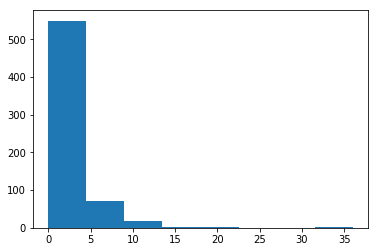

In [38]:
## #                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
plt.hist(passing_lessons, bins = 8)
# ax2.plot(non_passing_lessons, bins = 20)
# ax3.plot(passing_minutes, bins = 20)
# ax4.plot(non_passing_minutes, bins = 20)
# ax5.plot(passing_day, bins = 20)
# ax6.plot(non_passing_day, bins = 20)

(array([325.,  11.,   8.,   1.,   1.,   1.,   0.,   1.]),
 array([ 0.   ,  3.375,  6.75 , 10.125, 13.5  , 16.875, 20.25 , 23.625,
        27.   ]),
 <a list of 8 Patch objects>)

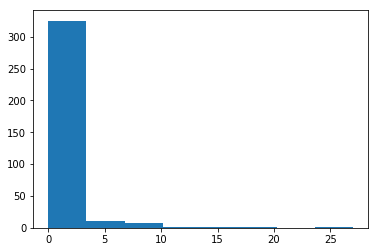

In [39]:
plt.hist(non_passing_lessons, bins = 8)

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.